# COURSE: Master statistics and machine learning: Intuition, Math, code
##### COURSE URL: udemy.com/course/statsml_x/?couponCode=202304 
## SECTION: Correlation
### VIDEO: Correlation coefficient
#### TEACHER: Mike X Cohen, sincxpress.com

In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

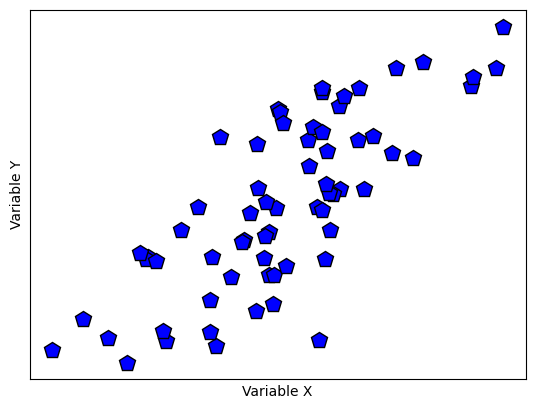

In [2]:
## simulate data

N = 66

# generate correlated data - this is a good method to simulate correlated data:
x = np.random.randn(N) # generate X however you want
y = x + np.random.randn(N) # set y to be equal to X with a little bit of random noise (add randn(N))
# y = x + np.random.randn(N) * 9 or ... * .09 --  # if you want to increase or decrease then multiply by high or low num

# Note, using this method it's difficult to control the exact correlation between the variables, there are other methods for controlling the exact correlation amount

# plot the data
plt.plot(x,y,'kp',markerfacecolor='b',markersize=12)
plt.xlabel('Variable X')
plt.ylabel('Variable Y')
plt.xticks([])
plt.yticks([])
plt.show()

In [4]:
## compute covariance between the variables x and y

 ### These are multiple ways to compute the covariance:
# the best in practice and most concise is to use numpy: covar3 = np.cov(np.vstack((x,y)))


# precompute the means  to prep for computing covariance manually
meanX = np.mean(x)
meanY = np.mean(y)

### the loop method - first method and most direct impl of formula
covar1 = 0 # initialize covariance to zero
for i in range(N):
    covar1 = covar1 + (x[i]-meanX)*(y[i]-meanY) # formula for covariance - sum mean centered var diffs
    

# and now for the normalization - normalize by dividing by n-1 (ddof)
covar1 = covar1/(N-1)

### second method - the linear algebra method
xCent = x-meanX # mean center the vars to prepare for use below
yCent = y-meanY
covar2 = np.dot(xCent,yCent) / (N-1) # equivalent to formula: use numpy's dot product -the sum of element wise multiplication (same as formula above)

### the Python method - this is the best and most concise used in practice
covar3 = np.cov(np.vstack((x,y))) # stack the vectors into a matrix of 2 cols - the first col is X and the second col is Y

print(covar1)
print(covar2)
print(covar3) # prints 2 col matrix where the bottm left to top right diagnal vals is the covariance and the other vals are the variance of x and y respectively
# [[1.04498386 1.02742764] # 1.04... is the variance of x, and 1.02... is the covariance
#  [1.02742764 1.71192364]] # 1.02.... is the covariance and 1.71... is the variance of y

1.027427637578439
1.027427637578439
[[1.04498386 1.02742764]
 [1.02742764 1.71192364]]


In [6]:
## now for correlation

### the long method - manual calc
corr_num = sum( (x-meanX) * (y-meanY) ) # numerator - element wise sum with means removed
corr_den = sum((x-meanX)**2) * sum((y-meanY)**2) # denominator (same concept but squared)
corr1 = corr_num/np.sqrt(corr_den) # run formula - take square root of denominator


### the Python method - use this in practice
corr2 = np.corrcoef(np.vstack((x,y)))

print(corr1)
print(corr2)
# [[1.         0.76816454] # 1 is correlation of x with itself, 0.7... is the correlation of x and y
#  [0.76816454 1.        ]] # 1 is correlation of y with itself

0.7681645430868643
[[1.         0.76816454]
 [0.76816454 1.        ]]


In [8]:
## correlation as normalized covariance

# For illustration, you can compute the covariance of two variables, and if they are normalized with a mean of zero and a variance of 1, the covariance is equal to their correlation
# compute the covariance between x and y:
xn = stats.zscore(x,ddof=1) # use degrees of freedom of 1
yn = stats.zscore(y,ddof=1)

corr3 = np.dot(xn,yn) / (N-1)

## If the data is all appropriately z-scored, then covariance and correlation are the same thing

print(corr3) # should be about equal to correlation computed in previous cell

0.7681645430868643


C:\Users\New AMD 5600G Build\AppData\Local\Temp\ipykernel_10248\3477354460.py:24: RuntimeWarning: divide by zero encountered in scalar divide
  tmatrix[ri,ni] = num/den # the t-statistic is this ratio
C:\Users\New AMD 5600G Build\AppData\Local\Temp\ipykernel_10248\3477354460.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  pmatrix[ri,ni] = 1-stats.t.cdf(abs(num/den),n[ni]-2) # p-value, n-2 ddof and use abs to not worry about negative values (indicating left/right side of t distribution)


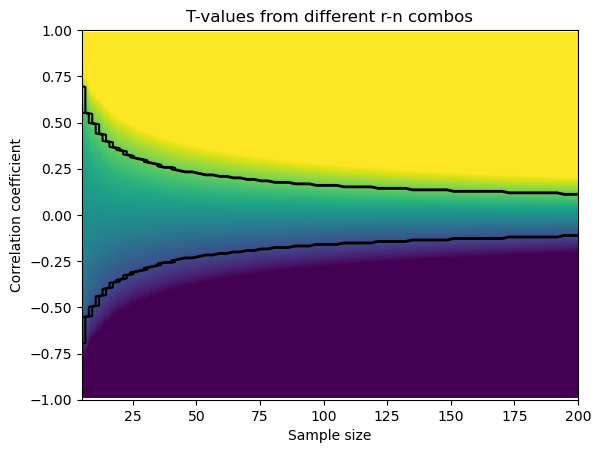

In [9]:
### Statistical Signficance of correlations


## 2D t-value space based on r(correlation magnitudes)  and n (sample sizes)

# define parameters for building a theoretical distribution (we don't need any actual data)
r = np.linspace(-1,1,248) # correlation coefficients range from -1 to +1
n = np.round( np.linspace(5,200,73) ) # sample points are from 5 up to 200

# initialize t-value matrix
tmatrix = np.zeros((len(r),len(n)))
pmatrix = np.zeros((len(r),len(n)))

# systematically vary r (correlation coefficient) and systematically vary n (sample size)
# recompute t and the corresponding p-value
for ri in range(len(r)):
    for ni in range(len(n)):
        
        # the t-value, split into num/den
        num = r[ri]*np.sqrt(n[ni]-2) # numerator of t statistic - r * square root of n-2 ddof (since pairs)
        den = 1-r[ri]**2 # denominator 1-r^2
        
        # Note this is manual and in practice you won't need to do this
        tmatrix[ri,ni] = num/den # the t-statistic is this ratio
        pmatrix[ri,ni] = 1-stats.t.cdf(abs(num/den),n[ni]-2) # p-value, n-2 ddof and use abs to not worry about negative values (indicating left/right side of t distribution)
        # if you look at pmatrix<0.5 that will cover both ends of the tail now with one expression and color those points in
        
        
# Shows correlations of different sample sizes and draws lines for the alpha threshold
plt.imshow(tmatrix,vmin=-3,vmax=3,extent=[n[0],n[-1],r[0],r[-1]],aspect='auto',origin='lower')
plt.contour(pmatrix<.05,1,colors='k',extent=[n[0],n[-1],r[0],r[-1]]) # black line - threshold of 5%, anything above the top line or below the bottom line indicate t-values (correlations) that are signficant
plt.xlabel('Sample size')
plt.ylabel('Correlation coefficient')
plt.title('T-values from different r-n combos')
plt.show()

# what this shows is that if we have a small correlation with a small sample size, then that correlation coefficient is not going to be statistically significant
# as we add more data (higher n sample size) that t statistic (the correlation shown on y axis) becomes more and more significant (i.e. outside black alpha threshold line)
# IOW, we can have the same linear magnitude relationship between variables and as we add more and more data into the mix that correlation becomes more and more significant as the p-value gets smaller and smaller

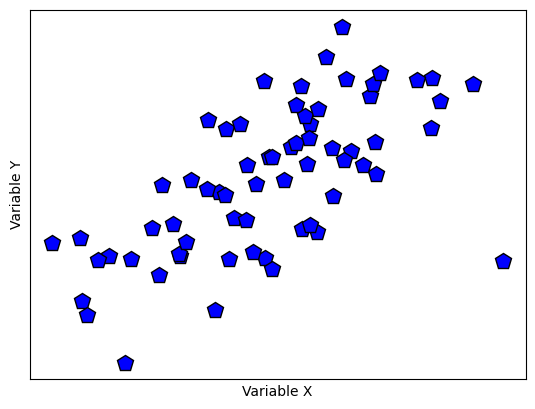

0.6523764927918694 2.9454818948887557e-09


In [12]:
N = 66

# generate correlated data - this is a good method to simulate correlated data:
x = np.random.randn(N) # generate X however you want
y = x + np.random.randn(N) # set y to be equal to X with a little bit of random noise (add randn(N))
# y = x + np.random.randn(N) * 9 or ... * .09 --  # if you want to increase or decrease then multiply by high or low num

# Note, using this method it's difficult to control the exact correlation between the variables, there are other methods for controlling the exact correlation amount

# plot the data
plt.plot(x,y,'kp',markerfacecolor='b',markersize=12)
plt.xlabel('Variable X')
plt.ylabel('Variable Y')
plt.xticks([])
plt.yticks([])
plt.show()

# final note on statistical significance
# use this in practice: the stats module from scipy has a pearsonr function that returns both the correlation r and the p value p (the other builtin correlation method does not return p-value)
r,p = stats.pearsonr(x,y) # pearson correlation of how correlated x and y data is from above
print(r,p)
# you'll see the -value is very low (below 5%) so the correlation shown is statistically significant
# If the p-value is below a chosen significance level (e.g., 0.05), it suggests that there is evidence to reject the null hypothesis of no correlation.

# The p-value is associated with a hypothesis test. 
# It indicates the probability of observing a Pearson correlation as extreme as the one calculated from the sample data, assuming that the true correlation in the population is zero (null hypothesis). 
# A low p-value (typically below a chosen significance level, e.g., 0.05) suggests that the correlation is statistically significant.

## Example:
# 0.6704674408614397 7.35553197543038e-10
# this means that there is 7.35... to the negative 10 percent change (extremely small) of the data being correlated at 0.67... if the null hypothesis is true (there is no correlation)